# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

In [169]:
source_url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv"
dataset = pd.read_csv(source_url)

### Step 3. Assign it to a variable called tips

In [170]:
tips = dataset

In [185]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


### Step 4. Delete the Unnamed 0 column

In [172]:
tips = tips.loc[:, ~tips.columns.str.match("^Unnamed")]

### Step 5. Plot the total_bill column histogram

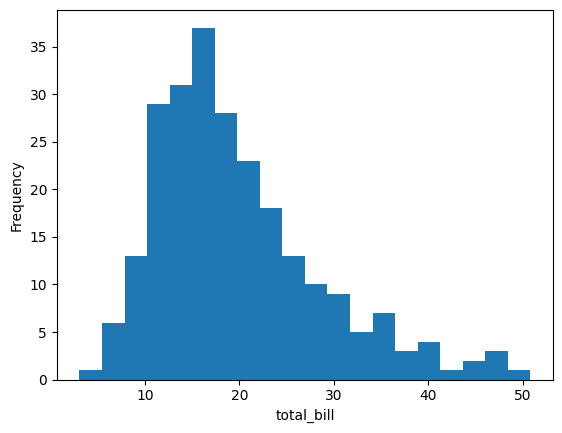

In [173]:
tips['total_bill'].plot(kind='hist', bins=20)

plt.xlabel('total_bill')

plt.show()

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

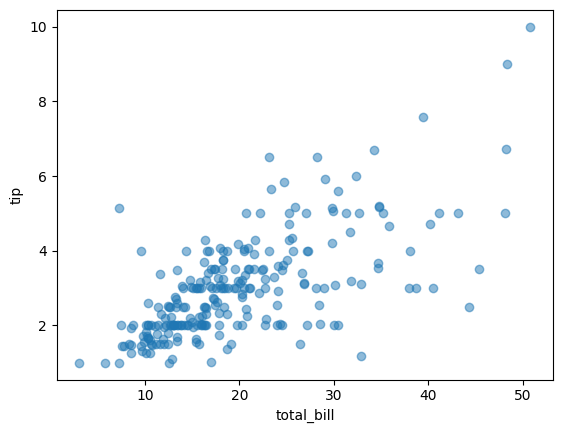

In [174]:
plt.scatter(tips['total_bill'], tips['tip'], alpha=0.5)

plt.xlabel("total_bill")
plt.ylabel("tip")

plt.show()

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

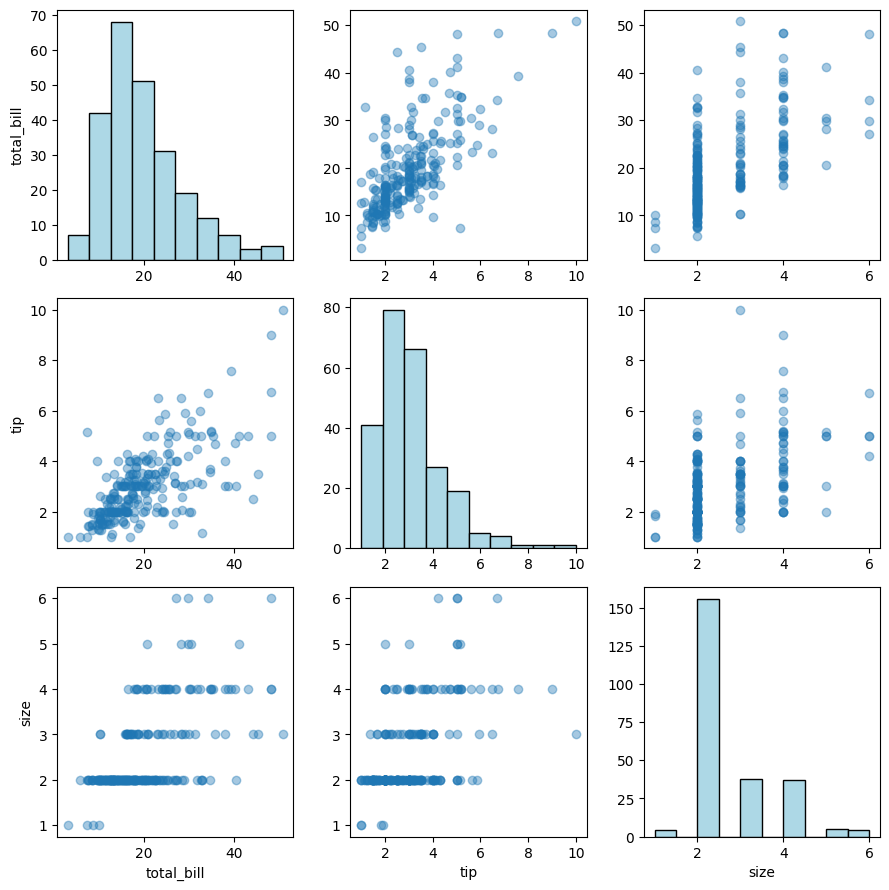

In [175]:
# One function in seaborn perhaps...

n = 3
cols = ['total_bill', 'tip', 'size']

fig, axes = plt.subplots(n, n, figsize=(9, 9))

for i, col_y in enumerate(cols):
    for j, col_x in enumerate(cols):
        ax = axes[i, j]
        
        if i == j:
            ax.hist(tips[col_x], bins=10, color="lightblue", edgecolor="black")
        else:
            ax.scatter(tips[col_x], tips[col_y], alpha=0.4)
            
        if i < n - 1:
            pass
        else:
            ax.set_xlabel(col_x)
            
        if j > 0:
            pass
        else:
            ax.set_ylabel(col_y)

plt.tight_layout()
plt.show()

### Step 8. Present the relationship between days and total_bill value

In [176]:
list(tips['day'].unique())

['Sun', 'Sat', 'Thur', 'Fri']

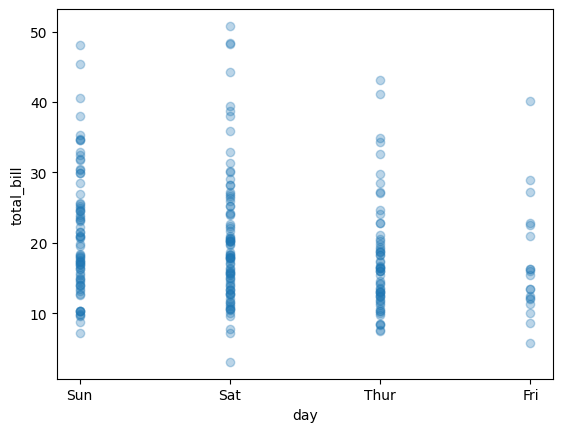

In [177]:
days = tips['day'].unique()

plt.scatter(tips['day'], tips['total_bill'], alpha=0.3)

plt.xticks(range(len(days)), days)
plt.ylabel("total_bill")
plt.xlabel("day")

plt.show()

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

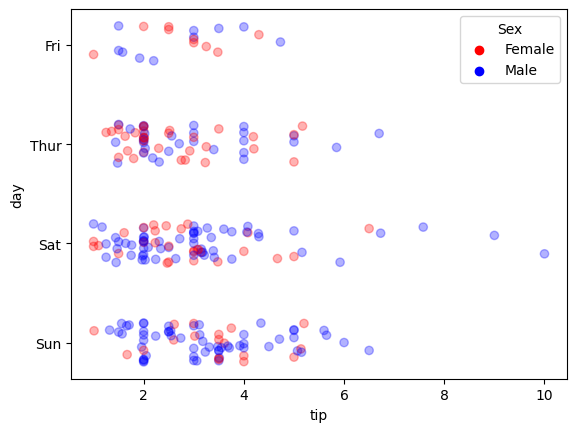

In [178]:
color_map = {"Female": "red", "Male": "blue"}
sex_color = lambda x: color_map[x]

days = tips['day'].unique()
day_numeric = tips['day'].apply(lambda d: np.where(days == d)[0][0])

y_jittered = day_numeric + np.random.uniform(-0.2, 0.2, size=len(tips))
x = tips['tip']

plt.scatter(x, y_jittered, alpha=0.3, color=tips['sex'].apply(sex_color))

plt.yticks(range(len(days)), days)
plt.ylabel("day")
plt.xlabel("tip")

color_map = {"Female": "red", "Male": "blue"}
for sex, color in color_map.items():
    plt.scatter([], [], color=color, label=sex)

plt.legend(title="Sex")
plt.show()

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

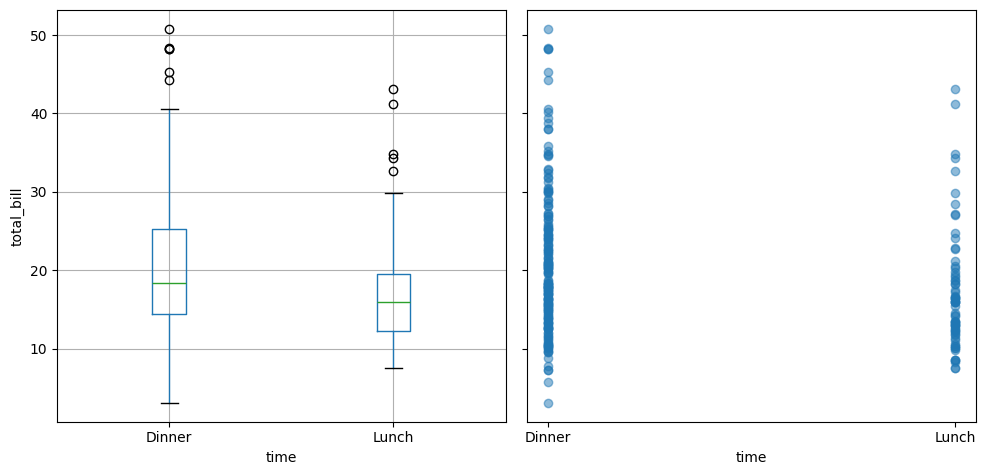

In [179]:
# I will draw two plots to compare scatter to box

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

axes[1].scatter(
    tips['time'],
    tips['total_bill'],
    alpha=0.5
)
axes[1].set_xlabel("time")

tips.boxplot(
    column="total_bill",
    by="time",
    ax=axes[0]
)
axes[0].set_ylabel("total_bill")
axes[0].set_title("")
fig.suptitle("")

plt.tight_layout()
plt.show()

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

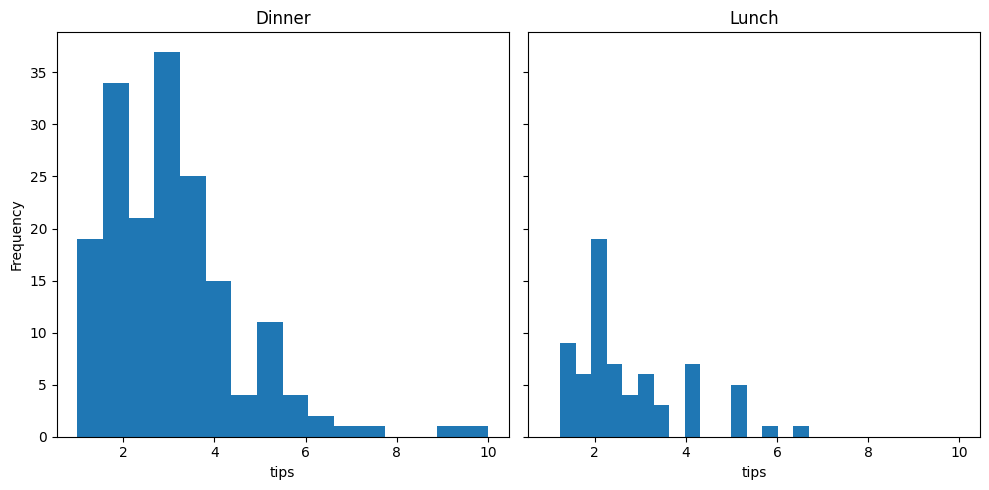

In [180]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)

axes[0].hist(tips.loc[tips['time'] == "Dinner", 'tip'], bins=16)

axes[0].set_xlabel("tips")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Dinner")

axes[1].hist(tips.loc[tips['time'] == "Lunch", 'tip'], bins=16)

axes[1].set_xlabel("tips")
axes[1].set_title("Lunch")

plt.tight_layout()
plt.show()

In [181]:
val_cnt = tips['time'].value_counts()
print(f"Dinner/Lunch observations ratio: {(val_cnt["Dinner"] / val_cnt["Lunch"]):.02f}")

Dinner/Lunch observations ratio: 2.59


### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

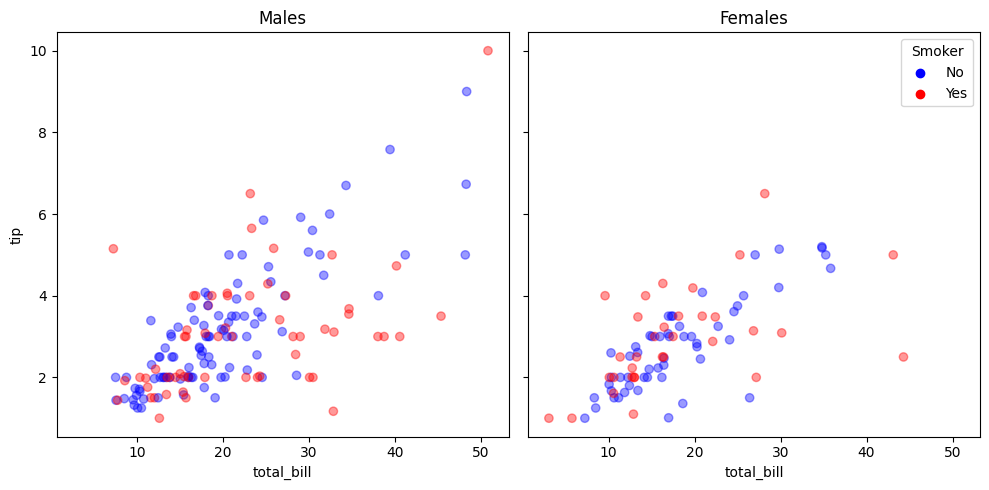

In [182]:
male_df = tips.loc[tips['sex'] == "Male", ['total_bill', 'tip', 'smoker']]
female_df = tips.loc[tips['sex'] == "Female", ['total_bill', 'tip', 'smoker']]

color_map = {"No": "blue", "Yes": "red"}
smoker_color = lambda x: color_map[x]

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)

axes[0].scatter(male_df['total_bill'], male_df['tip'], alpha=0.4, color=male_df['smoker'].apply(smoker_color))

axes[0].set_xlabel("total_bill")
axes[0].set_ylabel("tip")
axes[0].set_title("Males")

axes[1].scatter(female_df['total_bill'], female_df['tip'], alpha=0.4, color=female_df['smoker'].apply(smoker_color))

axes[1].set_xlabel("total_bill")
axes[1].set_title("Females")

for smoker, color in color_map.items():
    plt.scatter([], [], color=color, label=smoker)

plt.legend(title="Smoker")
plt.tight_layout()
plt.show()

### BONUS: Create your own question and answer it using a graph.

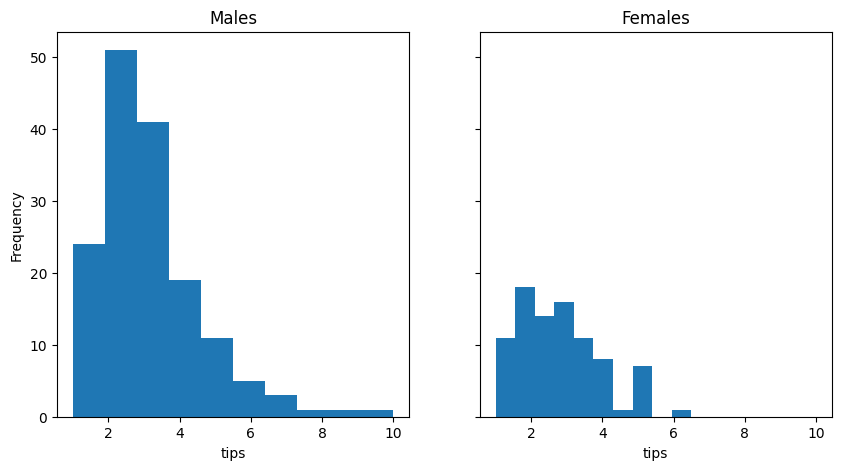

In [183]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

axes[0].hist(tips.loc[tips['sex'] == "Male", 'tip'])

axes[0].set_xlabel("tips")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Males")

axes[1].hist(tips.loc[tips['sex'] == "Female", 'tip'])

axes[1].set_xlabel("tips")
axes[1].set_ylabel("")
axes[1].set_title("Females")

plt.show()

In [184]:
# To be fair...

val_cnt = tips['sex'].value_counts()
print(f"Male/Female observations ratio: {(val_cnt["Male"] / val_cnt["Female"]):.02f}")

Male/Female observations ratio: 1.80
